# Diffusion eqaution

Consider the diffusion eqaution on the interval $[0,L]\times[0,T]$ with the periodic boundary condiction and $0<\alpha<1$.
$$
\begin{cases}
    _0^CD_t^{\alpha}u(x,t)= u_{xx}, &x\in[0,L],t\in[0,T] \\
    u(0+h,t) = u(L+h,t), &h\in[0,L],t\in[0,T]
\end{cases}
$$

where $$_0^CD_t^{\alpha}u(x,t)=\dfrac{1}{\Gamma{(1-\alpha)}}\int^t_0(t-s)^{-\alpha}\dfrac{\partial}{\partial t}u(x,s)ds$$ is the Caputo Derivative with $0<\alpha<1$.

## L1-Scheme
[Implicit finite difference approximation for time fractional diffusion equations](https://www.sciencedirect.com/science/article/pii/S0898122108001156)

Define $\Delta t=T/N$ to be the uniformly temporal step and $\Delta x=L/M$ to be the uniformly spatal step. The temporal grid point is $t_k=t_0+k\Delta t,k=0,1,2,\dots,N$ and spatal grid point is $x_k=x_0+k\Delta x,k=0,1,2,\dots,M$ where $t_0$ and $x_0$ are $0$. Denote $u^i_j$  to be the approximation of $u(x_j,t_i)$.

The fractional operator $_0^CD_t^{\alpha}u(x_i,t_n)$ can be approximated by $$_0^CD_t^{\alpha}u(x_i,t_n)\approx \dfrac{1}{\Gamma{(1-\alpha)}}\sum^{n}_{k=1} \int^{t_{k}}_{t_{k-1}} (t_n-s)^{-\alpha} \left(\dfrac{u(x_i,t_{k})-u(x_i,t_{k-1})}{\Delta t}\right)ds$$ where $\dfrac{u(x_i,t_{k})-u(x_i,t_{k-1})}{\Delta t}$ is approximation of $\dfrac{\partial}{\partial t}u(x_i,t_{k})$.

Therefore, the L1-scheme can be obtained
$$
\begin{align}
    _0^CD_t^{\alpha}u(x_i,t_n)
    &\approx \dfrac{1}{\Gamma{(1-\alpha)}} \sum^n_{k=1} \int^{t_{k}}_{t_{k-1}} (t_n-s)^{-\alpha} \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right)ds \\
    & = \dfrac{1}{\Gamma{(1-\alpha)}} \sum^n_{k=1} \dfrac{-1}{1-\alpha} (t_n-s)^{1-\alpha} \Big|^{t_{k}}_{t_{k-1}} \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right) \\
    & = \dfrac{1}{(1-\alpha)\Gamma{(1-\alpha)}} \sum^n_{k=1} \left[(t_n-t_{k-1})^{1-\alpha}-(t_n-t_{k})^{1-\alpha}\right] \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right) \\
    & = \dfrac{1}{\Gamma{(2-\alpha)}} \sum^n_{k=1} \left[((n-k+1)\Delta t)^{1-\alpha}-((n-k)\Delta t)^{1-\alpha}\right] \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right) \\
    & = \dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \sum^n_{k=1} \left[(n-k+1)^{1-\alpha}-(n-k)^{1-\alpha}\right] \left(\dfrac{u^{k}_i-u^{k-1}_i}{\Delta t}\right)
\end{align}
$$ shifting indices,
$$
\begin{align}
    _0^CD_t^{\alpha}u(x_i,t_n)
    &\approx \dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \sum^n_{j=1} \left[(j)^{1-\alpha}-(j-1)^{1-\alpha}\right] \left(u^{n-j+1}_i-u^{n-j}_i\right) \\
    & = \dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \sum^n_{j=1} \omega^{(\alpha)}_{j} \left(u^{n-j+1}_i-u^{n-j}_i\right),0<\alpha<1
\end{align}
$$, where $\omega_j^{(\alpha)} = [j^{1-\alpha}-(j-1)^{1-\alpha}]$


|$\omega_j^{(\alpha)}$ | $\alpha=0$ | $\alpha=0.3$ | $\alpha=0.5$ | $\alpha=0.7$ |
|------|:------:|:------:|:------:|:------:|
|$j=1$ | 1.0 | 1.0 | 1.0 | 1.0 |
|$j=2$ | 1.0 | 0.8660659830736148 | 0.41421356237309515 | 0.07177346253629313 |
|$j=3$ | 1.0 | 0.8218093964486717 | 0.31783724519578205 | 0.044349711497611244 |

## Full-scheme

Approximate spatal domain by central difference, then we have the full scheme of diffusion equation $$\dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \sum^n_{j=1} \omega^{(\alpha)}_j \left(u^{n-j+1}_i-u^{n-j}_i\right) = \dfrac{u^{n}_{i-1} -2u^{n}_i + u^{n}_{i+1}}{\Delta x^2} \text{, for } i=0,1,\dots,M-1$$

$$\dfrac{\Delta t^{-\alpha}}{\Gamma{(2-\alpha)}} \left(\omega^{(\alpha)}_1\left(u^{n}_i-u^{n-1}_i\right) + \sum^n_{j=2} \omega^{(\alpha)}_j \left(u^{n-j+1}_i-u^{n-j}_i\right) \right)= \dfrac{u^n_{i-1} -2u^n_i + u^n_{i+1}}{\Delta x^2}$$

$$\left(u^{n}_i-u^{n-1}_i\right) + \sum^n_{j=2} \omega^{(\alpha)}_j \left(u^{n-j+1}_i-u^{n-j}_i\right) = \dfrac{\Delta t^{\alpha}}{\Delta x^2}\Gamma{(2-\alpha)} \left(u^n_{i-1} -2u^n_i + u^n_{i+1}\right)$$

For $n=1$, $$u^1_i-u^0_i=\dfrac{\Delta t^{\alpha}}{\Delta x^2}\Gamma{(2-\alpha)} \left(u^1_{i-1} -2u^1_i + u^1_{i+1}\right)$$
$$u^0_i=-ku^1_{i-1}+ (1+2k)u^1_i -ku^1_{i+1}$$, where $k=\dfrac{\Delta t^{\alpha}}{\Delta x^2}\Gamma{(2-\alpha)}$.

and for $n\geq2$, $$-ku^{n}_{i-1}+ (1+2k)u^{n}_i -ku^{n}_{i+1}=u^{n-1}_i-\sum^n_{j=2} \omega^{(\alpha)}_j \left(u^{n-j+1}_i-u^{n-j}_i\right)$$

Let $U^n$ be the vector form of the $u^n_i$ for $i=0,1,\dots,M$ as following 
$$ U^n =
\begin{bmatrix}
    u^n_0 \\
    u^n_1 \\
    \vdots \\
    u^n_{m-1} \\
    u^n_{m}
\end{bmatrix}
$$

with the periodic boundary condition $u(0+\Delta x,t)=u(L+\Delta x,t)$. Let 
$$ K =
\begin{bmatrix}
    1+2k & -k & 0 & \dots & 0 & -k & 0 \\
    -k & 1+2k & -k & 0 & \dots & 0 & 0 \\
    0 & -k & 1+2k & -k & 0 & \dots & 0 \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots\\ 
    0 & \dots & 0 & -k & 1+2k & -k & 0 \\
    0 & 0 & \dots & 0 & -k & 1+2k & -k\\ 
    0 & -k & 0 &  \dots & 0 & -k & 1+2k
\end{bmatrix}
$$

hence, $$U^{n}=K^{-1} \left(U^{n-1} - \sum^n_{j=2} \omega^{(\alpha)}_j \left(U^{n-j+1}-U^{n-j}\right)\right), \text{for } n\geq 2$$ and 
$$U^1 = K^{-1}U^0$$

## Mass
[DETAILED ANALYSIS OF A CONSERVATIVE DIFFERENCE
APPROXIMATION FOR THE TIME FRACTIONAL
DIFFUSION EQUATION]()

stable when $\dfrac{(\Delta t)^{\alpha}}{(\Delta x)^2} \leq \dfrac{1-2^{-\alpha}}{\Gamma{(2-\alpha)}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def set_quadrature(j, alpha):
    return (j)**(1-alpha) - (j-1)**(1-alpha)

# Set up the parameters
nx = 11   # number of grid points in x-direction
L = 1     # length of the domain in each direction
dx = L / (nx - 1)   # grid spacing in x-direction
x = np.linspace(0, L, nx)   # x-coordinates of the grid points

dt = 1e-5      # time step
timesteps = 10**3   # number of time steps

alpha = 0.5

k = (dt**alpha/dx**2) * gamma(2-alpha)

diagonals = [-k*np.ones(nx), (1+2*k)*np.ones(nx), -k*np.ones(nx)]
offsets = [-1, 0, 1]
K = diags(diagonals, offsets, shape=(nx, nx), format='csr')
K[0,-2] = -k
K[-1,1] = -k

C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [2]:
from tqdm import tqdm

u0 = np.sin(2*np.pi*x)

history_u = [u0]
mass_list = [0]

process = tqdm(total=timesteps)

u = spsolve(K, u0)
history_u.append(u)
mass_list.append(sum(u0-u) * dx)

for i in range(2,timesteps+2):
    u_prev = history_u[-1]
    
    for j, _ in reversed(list(enumerate(history_u))):
        if j >= 1:
            omega = set_quadrature(j, alpha)
            u_prev -= omega * (history_u[j]-history_u[j-1])
    
    u = spsolve(K, u_prev)
    history_u.append(u)
    mass_list.append(sum(u0-u)*dx)
    
    process.update(1)
    
process.close()

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 574.54it/s]


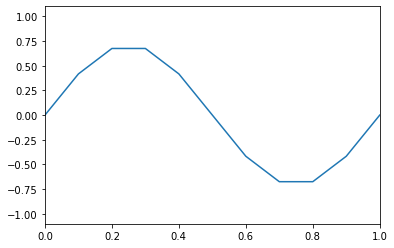

In [3]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(0,L)
ax.set_ylim(-1.1, 1.1)
line, = ax.plot(0,0)

def animate(i):
    line.set_xdata(x)
    line.set_ydata(history_u[i])
    return line,

ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0,timesteps,10), blit=True)

# plt.show()

from IPython.display import HTML
HTML(ani.to_jshtml())

<Figure size 432x288 with 0 Axes>

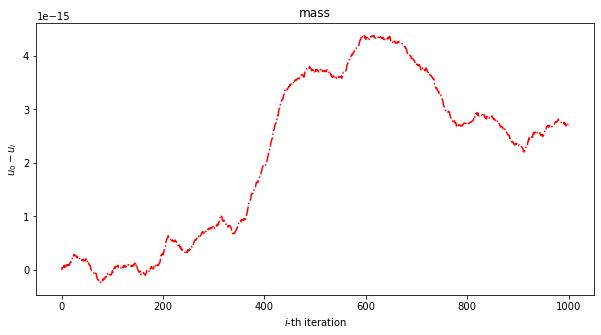

In [4]:
plt.figure(1)
plt.figure(figsize=(10,5))
plt.plot(mass_list, 'r-.')
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
# plt.ylim(-1e-13,1e-13)
plt.show()

In [5]:
nx = 11
dx = L / (nx - 1)
dt = 1e-5
(dt**alpha)/(dx**2)

0.3162277660168379

In [6]:
(1-2**(-alpha))/gamma(2-alpha)

0.3304946062926472

In [7]:
j = np.arange(1, timesteps+1)
omega = set_quadrature(j, alpha)
omega[1]

0.41421356237309515

C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 744.30it/s]


<Figure size 432x288 with 0 Axes>

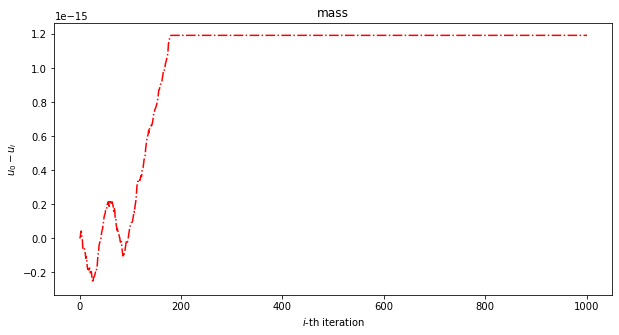

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def set_quadrature(j, alpha):
    return (j)**(1-alpha) - (j-1)**(1-alpha)

# Set up the parameters
nx = 11   # number of grid points in x-direction
L = 1     # length of the domain in each direction
dx = L / (nx - 1)   # grid spacing in x-direction
x = np.linspace(0, L, nx)   # x-coordinates of the grid points

dt = 1e-5      # time step
timesteps = 10**3   # number of time steps

alpha = 0.5

## stable when $\dfrac{(\Delta t)^{\alpha}}{(\Delta x)^2} \leq \dfrac{1-2^{-\alpha}}{\Gamma{(2-\alpha)}}$

k = ((dt**alpha)/(dx**2)) * gamma(2-alpha)

diagonals = [k*np.ones(nx), (1-2*k)*np.ones(nx), k*np.ones(nx)]
offsets = [-1, 0, 1]
K = diags(diagonals, offsets, shape=(nx, nx), format='csr')
K[0,-2] = k
K[-1,1] = k

from tqdm import tqdm

u0 = np.sin(2*np.pi*x)

history_u = [u0]
mass_list = [0]

process = tqdm(total=timesteps)

# first iteration
u = K * u0
history_u.append(u)
mass_list.append(sum(u0-u) * dx)

j = np.arange(1, timesteps+1)
omega = set_quadrature(j, alpha)

# iteration
for i in range(2,timesteps+2):
    u_prev = history_u[-1]
    u = K * u_prev
    for j, _ in reversed(list(enumerate(history_u))):
        if j >= 1:
            u = u -  omega[j-1] * (history_u[j]-history_u[j-1])
        else:
            break

    history_u.append(u)
    mass_list.append(sum(u0-u)*dx)
    
    process.update(1)
    
process.close()

plt.figure(1)
plt.figure(figsize=(10,5))
plt.plot(mass_list, 'r-.')
# plt.hlines(0, xmin=0, xmax=timesteps)
plt.title("mass")
plt.ylabel("$u_0 - u_i$")
plt.xlabel("$i$-th iteration")
# plt.ylim(-1e-14,1e-14)
plt.show()

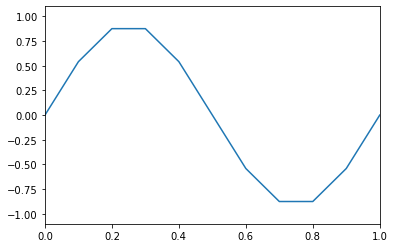

In [10]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(0,L)
ax.set_ylim(-1.1, 1.1)
line, = ax.plot(0,0)

def animate(i):
    line.set_xdata(x)
    line.set_ydata(history_u[i])
    return line,

ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0,timesteps,10), blit=True)

# plt.show()

from IPython.display import HTML
HTML(ani.to_jshtml())

In [11]:
history_u[300]

array([-1.02253140e-15,  5.40469855e-01,  8.74498595e-01,  8.74498595e-01,
        5.40469855e-01, -8.18052774e-16, -5.40469855e-01, -8.74498595e-01,
       -8.74498595e-01, -5.40469855e-01, -1.21810905e-15])

In [12]:
(u[0]-u[1]-u[-2]+u[-1]) * k *dx

3.199289199109708e-18